# Центральная предельная теорема своими руками

## Постановка задачи

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Теоретическая часть

Воспользуемся распределением хи-квадрат, т.е. распределением Пирсона.

#### Определение

$${\displaystyle z_{1},\ldots ,z_{k}}$$ — совместно независимые стандартные нормальные случайные величины, то есть: $${\displaystyle z_{i}\sim N(0,1)}$$ Тогда случайная величина: $${\displaystyle x=z_{1}^{2}+\ldots +z_{k}^{2}}$$ имеет распределение хи-квадрат с k степенями свободы, то есть: $${\displaystyle x\sim f_{\chi ^{2}(k)}(x)}$$ или, если записать по-другому:
$${\displaystyle x=\sum \limits _{i=1}^{k}z_{i}^{2}\sim \chi ^{2}(k)}$$

#### Основные характеристики
Для случайной величины из хи-квадрат распределения: $${\displaystyle Y\sim \chi ^{2}(k)}$$
$${\displaystyle \mathbb {E} [Y]=k}$$
$${\displaystyle \mathrm {D} [Y]=2k}$$

Благодаря чему по центральной предельной теореме легко задаётся приблежение распределения хи-квадрат.

## Использованные материалы

* https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82
* https://pythonworld.ru/moduli/modul-math.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

## Реализация

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2
import math
%matplotlib inline

Зададим параметр распределения хи-квадрат k := 5:

In [122]:
# Число степеней свободы
k = 5

Опишем теоретическую функцию плотности вероятности:

In [123]:
# Функция плотности вероятности
def f(x):
    return ((0.5)**(k/2))*(x**(k/2 - 1))*(math.exp(-x/2))/math.gamma(k/2)

Строим гистограмму и график теоритической плотности:

c:\users\юрик\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


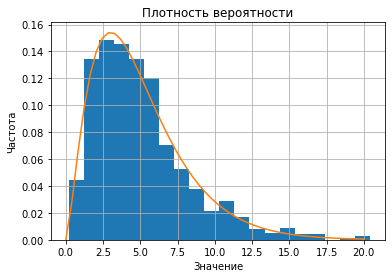

In [124]:
# Выборка объёма 1000
data = chi2.rvs(k, size=1000)
# Визуализация
x = np.linspace(0, 20, 50)
teor = [f(i) for i in x]
plt.title("Плотность вероятности")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid()
plt.hist(data, bins = 20, normed=True)
plt.plot(x, teor)
plt.show()

Для нескольких n сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. По центральной предельной теореме полученные распределения должны быть нормальными с параметрами, задаваемыми исходным хи-квадрат распределением.

c:\users\юрик\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


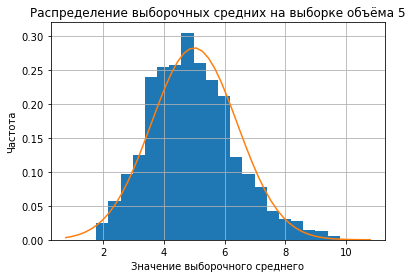

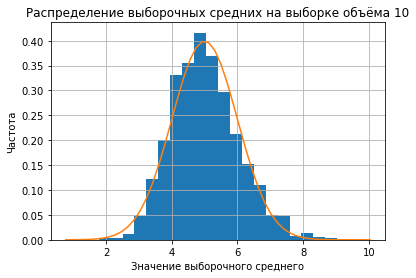

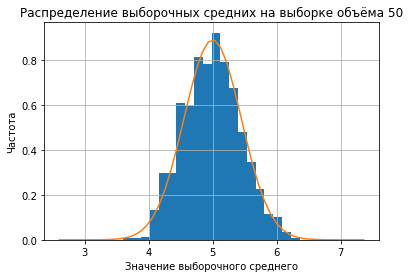

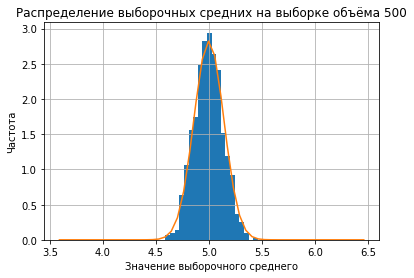

In [128]:
# Определим функцию Гаусса
def gauss(x, n):
    # Из свойств выбранного распределения
    u = k
    sigma = math.sqrt(2*k/n)
    # Формула функции Гаусса
    a = 1/(sigma*math.sqrt(2*math.pi))
    return a*math.exp(-((x-u)**2)/(2*sigma**2))

# Проверка ЦПТ
for n in [5, 10, 50, 500]:
    # Определение выборочных средних для 1000 выборок объёма n
    averages = []
    for i in range(1000):
        data = chi2.rvs(k, size=n)
        averages.append(np.mean(data))
    # Визуализация
    x = np.linspace(min(averages) - 1, max(averages) + 1, 50)
    teor = [gauss(i, n) for i in x]
    plt.title("Распределение выборочных средних на выборке объёма " + str(n))
    plt.xlabel("Значение выборочного среднего")
    plt.ylabel("Частота")
    plt.grid()
    plt.hist(averages, bins = 20, normed=True)
    plt.plot(x, teor)
    plt.show()

Как несложно убедиться из полученных результатов, эксперимент подтверждает центральную предельную теорему. Также стоит обратить внимание, что при увеличении объёма выборок распределение выборочных средних лучше описыватся нормальным распределением.